<a href="https://colab.research.google.com/github/shriya2909/Pricing-Test/blob/master/PricingTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Company XYZ sells a software for \$39. Since revenue has been flat for some time, the VP of Product has decided to run a test increasing the price. She hopes that this would increase revenue. In the experiment, 66% of the users have seen the old price (\$39), while a random sample of 33% users a higher price (\$59). The test has been running for some time and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users.

Especially need to answer the following questions:

1. Should the company sell its software for \$39 or \$59?

2. The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?

3.  The VP of Product feels that the test has been running for too long and she should have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days you would have stopped the test? Please, explain why.

# **Data**

Data includes two tables :<br>

1.   User_table - Information about the user.
2.   Test_results - Data about the test.

**Note **: For the purpose of the experiment, the group that sees the higher price is the experimental group while the one that sees the lower price is the control group.

# **Quick Answers**
1. *Should the company sell its software for \$39 or \$59?*
<br> <br>
Based on the result of the A/B testing, it is evident that the average revenue generated from the experimental group is greater than the control group(p-value <0.1*10^-8). Therefore, selling the software for \$59 would be good strategy. The control group's conversion rate is higher(1.99% v/s 1.556%) but presents lower average revenue per user relative to the experimental group. As revenue is the experimental variable in question as opposed to conversion rate, and thus it would be appropriate to increase the price.


2. *The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?*
<br>

>  User segments that were converted were : 
1.   Utilising Apple based products i.e. they were **MAC** and **iOS** users.
2.   Reaching the product via **Friend Referrals**.

> Surprisingly, that did not show much segementation in users that were converted as opposed to non converts was the choice of device used by them.

> In my opinion, optimising products for apple products and incentivizing friend referrals would be a good approach to maximize user groups that are likely to convert. Also, paying closer attention to groups that are least likely - **Linux** user may be a good utilisation not resources. My guess would be that the software maybe faulty when it comes to the Linux OS.




3.  *The VP of Product feels that the test has been running for too long and she should have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days you would have stopped the test? Please, explain why.*
<br><br>
Running the test for just **13 days** as opposed to 3 months resulted in p-value < 0.001 and therefore would have been sufficient to establish significant difference between the the average revenue of the two groups.
This was determined by calculating p-values for shorter time periods. By utilising the same A/B testing approach, it was checked whether running the A/B test for a shorter time period could still provide significant p-value. 


In [1]:
#Access the google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Setting working directory to the correct directory 
!pwd
%cd "/content/drive/My Drive/Pricing_Test_Data"
!pwd

/content
/content/drive/My Drive/Pricing_Test_Data
/content/drive/My Drive/Pricing_Test_Data


In [3]:
#Check if GPU is being utilised

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
#Read the csv files into a dataframes

import pandas as pd
pd.set_option('display.max_columns', None)
test_data = pd.DataFrame(pd.read_csv('./test_results.csv'))
user_data = pd.DataFrame(pd.read_csv('./user_table.csv'))

Checking for nulls

In [52]:
user_data.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [5]:
test_data.isnull().sum()

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
dtype: int64

In [6]:
user_data.isnull().sum()

user_id    0
city       0
country    0
lat        0
long       0
dtype: int64

In [7]:
test_data[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

user_id
test price         
0    39      202517
     59         210
1    39         155
     59      113918

The data is inconsistent. The column test and price do not correspond to appropriate values. Few users who are labelled with test=0 see the price \$59 instead of \$39. While some users who are labelled with test=1 see the price \$39.
The cause of the erroroneous data is not clear and the size of this data is not large therefore deleting these entries may be appropriate.

In [8]:
clean_ctrl = test_data[(test_data['test'] == 0) & (test_data['price'] == 39)] 
clean_exp = test_data[(test_data['test'] == 1) & (test_data['price'] == 59)] 
clean_test_data = pd.concat([clean_ctrl,clean_exp] )

In [9]:
clean_test_data[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

,,user_id
test,price,
0,39,202517
1,59,113918


Taking a look at conversion for both the test groups

In [10]:
clean_test_data[['price', 'converted', 'user_id']].groupby(['price', 'converted']).count()

user_id
price converted         
39    0           198487
      1             4030
59    0           112146
      1             1772

Joining user information with their corresponding test results.

In [11]:
tot_data = pd.merge(clean_test_data, user_data, on='user_id', how='left')

As revenue is the target variable, we make a column to calculate the revenue generated by a user based on the group the belong to and whether they were converted or not.

In [12]:
tot_data['revenue'] = tot_data['price'] * tot_data['converted'] 

In [13]:
tot_data[['test', 'converted']].groupby('test').mean()

,converted
test,
0,0.019900
1,0.015555


In [14]:
tot_data[['test', 'revenue']].groupby('test').mean()

,revenue
test,
0,0.776083
1,0.917748


In [15]:
#Checking if variances for both the groups is same or not.
#We know the sample sizes differ

import statistics 

var_ctrl = statistics.variance(tot_data[tot_data['test']== 0]['revenue'])
var_exp = statistics.variance(tot_data[tot_data['test']== 1]['revenue'])
print(var_ctrl)
print(var_exp)

29.665078490573645
53.305330173629486


# **A/B Testing**

We perform one-tailed Welch's T-test for unequal varianaces. 
<br> 
<br>
**Null hypothesis H0**: Control (test=0) group's average revenue is equal to or greater than experimental (test=1) group's average revenue.

**Alternative hypothesis H1**: Control group's average revenue is less than experimental group's average revenue.

In [16]:
from scipy.stats import ttest_ind

print(ttest_ind(tot_data[tot_data['test']== 0]['revenue'], tot_data[tot_data['test'] == 1]['revenue'], axis=0, equal_var=False))

Ttest_indResult(statistic=-5.715224666463108, pvalue=1.0972577312420781e-08)


As the p-value < 0.1, we can reject the Null hypothesis. Therefore, Control group's average revenue is not greater or equal to experimental group's average revenue.

# **Analysis of User Behaviour** 

As it is statistically established that average revenue for the experimental group is higher, next goal is to understand the user characterstics that lead to a higher conversion rate for the control group. 
<br>
This is achieved by analysing what differentiates the users that get converted from that do not. 
The user that are converted as oppoosed to that do not convert are grouped using multiple features - **Operating System**, **Device** and **Source**.

In [41]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Conversion rate per operative system')

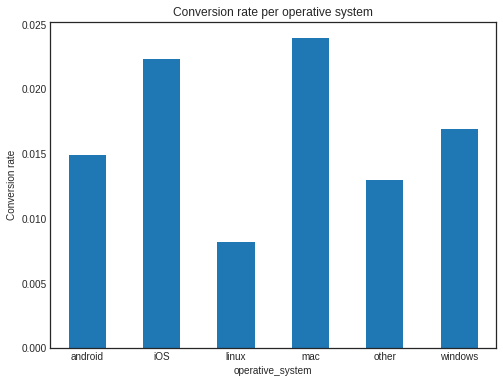

In [48]:
# Conversion rate per OS 
plt.rcParams['figure.figsize']=[8,6]
CR_operatings = tot_data.groupby("operative_system")["converted"].mean().plot(kind='bar')
plt.ylabel('Conversion rate')
plt.xticks(rotation=0)
plt.title('Conversion rate per operative system')

Text(0.5, 1.0, 'Conversion rate per device')

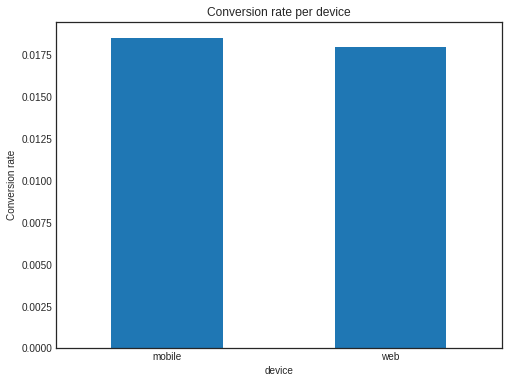

In [46]:
#Conversion rate per device
plt.rcParams['figure.figsize']=[8,6]
sourceplot = tot_data.groupby("device")["converted"].mean().plot(kind='bar')
plt.ylabel('Conversion rate')
plt.xticks(rotation=0)
plt.title('Conversion rate per device')

Text(0.5, 1.0, 'Conversion rate per source')

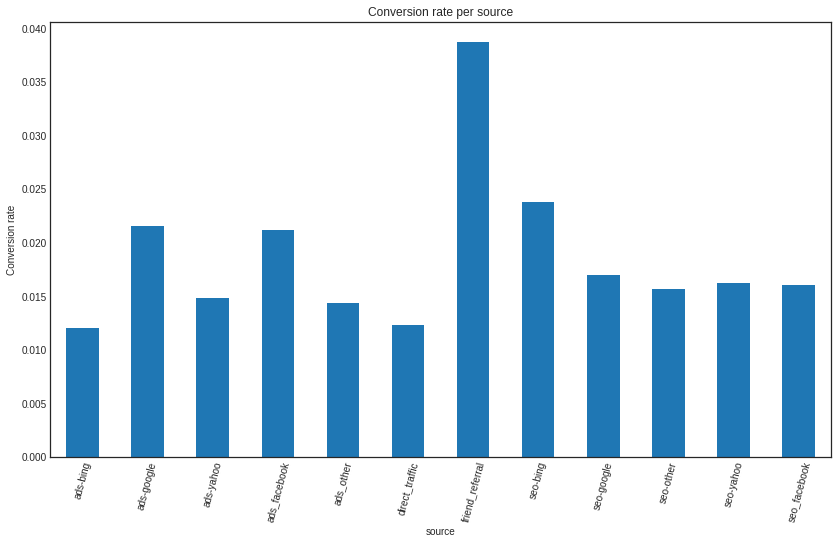

In [44]:
#Conversion rate per source
plt.rcParams['figure.figsize']=[14,8]
plt.style.use('seaborn-white')
sourceplot = tot_data.groupby("source")["converted"].mean().plot(kind='bar')
plt.ylabel('Conversion rate')
plt.xticks(rotation=75)
plt.title('Conversion rate per source')

# **How long is too long?** 



Running the test for just **13 days** as opposed to 3 months resulted in p-value < 0.001 thus would have been sufficient to establish significant difference between the the average revenue of the two groups. This was determined by calculating p-values for shorter time periods. By utilising the same A/B testing approach, it was checked whether running the A/B test for a shorter time period could still provide significant p-value.



In [35]:
print("Starting time of experiment")
min(tot_data['timestamp'])

Starting time of experiment


'2015-03-02 00:04:12'

In [37]:
#Data for each group for days for 1 month of exp
controlgr = tot_data[(tot_data['test'] == 0) & (tot_data['timestamp'] < '2015-04-02') ]['revenue'].values
testgr = tot_data[(tot_data['test'] == 1) & (tot_data['timestamp'] < '2015-04-02')]['revenue'].values
#perform Welch's t-test
print(ttest_ind(controlgr, testgr, axis=0, equal_var=False))

Ttest_indResult(statistic=-4.15414211702349, pvalue=3.2696683365610206e-05)


In [39]:
# Achieves significance (p-value < 0.001)within 13 days of starting the experiment i.e. before '2015-03-15'
controlgr = tot_data[(tot_data['test'] == 0) & (tot_data['timestamp'] < '2015-03-15') ]['revenue'].values
testgr = tot_data[(tot_data['test'] == 1) & (tot_data['timestamp'] < '2015-03-15')]['revenue'].values
#perform Welch's t-test
print(ttest_ind(controlgr, testgr, axis=0, equal_var=False))

Ttest_indResult(statistic=-3.3242015742721187, pvalue=0.0008879872459659555)
